# Inferential Statistics and Hypothesis Testing

### Objectives:
- Use probability distributions such as the normal, poisson, and binomial distributions to model the data.
- Calculate confidence intervals to estimate population parameters using the t-distribution and z-distribution to calculate confidence intervals for the mean and proportion, respectively.
- Conduct hypothesis tests using the t-test, F-test, ANOVA-test, and Chi-Square test to identify factors that contribute to credit card defaults.
- Interpret the results and provide recommendations based on the analysis.

### Business Objective:
The objective of this project is to identify factors that contribute to credit card defaults, which can help the credit card company to reduce losses, mitigate risks, and improve customer satisfaction. By gaining insights into the data and understanding the relationships between variables, the credit card company can make informed decisions to improve its business operations, marketing efforts, and customer targeting.

### Problem Statement:
1. Analyze the customer data to identify factors that contribute to credit card defaults. 
2. Clean and prepare the data, perform exploratory data analysis to identify relationships between variables, and use inferential statistics and hypothesis testing to draw meaningful conclusions about the population based on a sample.

## Understanding Credit Card System:
1. Every month, a customer is billed as per their transactions.
2. In the next month, by the due date, an amount between the range of minimum amount due and the full amount billed is paid by the customer.
3. The next bill will be the remaining amount from previous month plus the usage in the current month.
4. Missing minimum due payments lead to late payment charges and continued misses result in default.
5. A customer is considered a defaulter when he misses payment by the due date mentioned.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing Data into a Pandas Dataframe

In [2]:
df=pd.read_csv("Credit Dataset for HV Turnkey Lender.csv")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

df.head() # View the top 5 records

,ID,AMT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT
0,1,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Shape of the dataset to understand the amount of data we have on hand

In [3]:
df.shape

(30000, 25)

We have 25 columns and 30000 rows

#### Understanding the data, knowing what each column represents:
- ID: ID of each client
- AMT: Amount of given credit in dollars (includes individual and family/supplementary credit
- GENDER: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)
- MARITAL STATUS: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- REPAY_SEP: Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- REPAY_AUG: Repayment status in August, 2005 (scale same as above)
- REPAY_JUL: Repayment status in July, 2005 (scale same as above)
- REPAY_JUN: Repayment status in June, 2005 (scale same as above)
- REPAY_MAY: Repayment status in May, 2005 (scale same as above)
- REPAY_APR: Repayment status in April, 2005 (scale same as above)
- AMTBILL_SEP: Amount of bill statement in September, 2005
- AMTBILL_AUG: Amount of bill statement in August, 2005
- AMTBILL_JUL: Amount of bill statement in July, 2005
- AMTBILL_JUN: Amount of bill statement in June, 2005
- AMTBILL_MAY: Amount of bill statement in May, 2005
- AMTBILL_APR: Amount of bill statement in April, 2005
- PRE_SEP: Amount of previous payment in September, 2005
- PRE_AUG: Amount of previous payment in August, 2005
- PRE_JUL: Amount of previous payment in July, 2005
- PRE_JUN: Amount of previous payment in June, 2005
- PRE_MAY: Amount of previous payment in May, 2005
- PRE_APR: Amount of previous payment in April, 2005
- DEF_AMT: Default payment (1=yes, 0=no)

#### Missing Values Check:

In [4]:
df.isna().sum()

ID                 0
AMT                0
GENDER             0
EDUCATION         14
MARITAL STATUS     0
AGE                0
REPAY_SEP          0
REPAY_AUG          0
REPAY_JUL          0
REPAY_JUN          0
REPAY_MAY          0
REPAY_APR          0
AMTBILL_SEP        0
AMTBILL_AUG        0
AMTBILL_JUL        0
AMTBILL_JUN        0
AMTBILL_MAY        0
AMTBILL_APR        0
PRE_SEP            0
PRE_AUG            0
PRE_JUL            0
PRE_JUN            0
PRE_MAY            0
PRE_APR            0
DEF_AMT            0
dtype: int64

There are only 14 missing values in the 'EDUCATION' column. Since the number is insignificant, we shall drop the rows with these empty rows permanently.

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape #Check shape to confirm the size of the remaining data

(29986, 25)

From the EDA we performed earlier, we know that there are no duplicates and that the values are all in line. There are no junk values or special characters which might deter data modeling and prediction. So, let us move ahead with the probability modeling of the data.

#### Using Probability Distributions to model the data and calculating Confidence Intervals:

Let us start with AMT column. It's a continuous variable, so we may assume a normal, log normal or exponential distribution. Use:
- Shapiro-Wilk test for normality
- Kolmogorov-Smirnov test for log normal distribution
- chi-square goodness of fit test for exponential distribution

In [7]:
import scipy.stats as stats

# AMT Column
amt_column = df['AMT']

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = stats.shapiro(amt_column)
print('Shapiro-Wilk Test for Normality:')
print('Test Statistic=%.4f, p-value=%.4f' % (shapiro_stat, shapiro_p))
alpha = 0.05
if shapiro_p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test for Log Normal Distribution

# Fit a log-normal distribution to the data
params = stats.lognorm.fit(amt_column)

# Perform the Kolmogorov-Smirnov test
kstest_stat, kstest_p = stats.kstest(amt_column, 'lognorm', params)

# If the p-value is greater than 0.05, then the data is assumed to be log-normally distributed

print('Kolmogorov-Smirnov Test for Log Normal Distribution:')
print('Test Statistic=%.4f, p-value=%.4f' % (kstest_stat, kstest_p))
if kstest_p > alpha:
    print('Sample looks Log Normal (fail to reject H0)')
else:
    print('Sample does not look Log Normal (reject H0)')

    
# Chi-Square Goodness of Fit Test for Exponential Distribution
chi2_stat, chi2_p = stats.chisquare(amt_column)
print('Chi-Square Goodness of Fit Test for Exponential Distribution:')
print('Chi2 Statistic=%.4f, p-value=%.4f' % (chi2_stat, chi2_p))
if chi2_p > alpha:
    print('Sample distribution matches Exponential Distribution (fail to reject H0)')
else:
    print('Sample distribution does not match Exponential Distribution (reject H0)')


Shapiro-Wilk Test for Normality:
Test Statistic=0.9072, p-value=0.0000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test for Log Normal Distribution:
Test Statistic=0.7488, p-value=0.0000
Sample does not look Log Normal (reject H0)
Chi-Square Goodness of Fit Test for Exponential Distribution:
Chi2 Statistic=3014937179.0642, p-value=0.0000
Sample distribution does not match Exponential Distribution (reject H0)


Looks like the AMT column is not following any of the above distributions. Let us examine it's density plot.

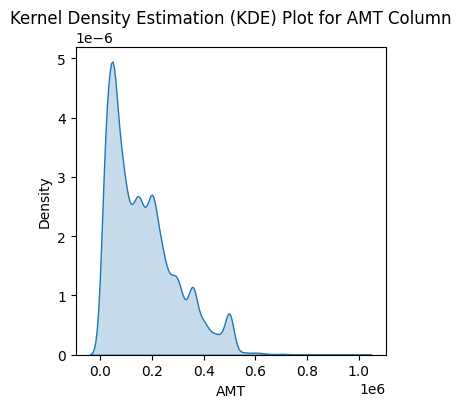

In [8]:
# KDE Plot for AMT Column
plt.figure(figsize=(4,4))
sns.kdeplot(amt_column, shade=True)
plt.title('Kernel Density Estimation (KDE) Plot for AMT Column')
plt.show()


From the density plot, we see that it is a skewed distribution. So in order to calculate the Confidence Intervals for point estimates, we can consider central limit theorem. We can draw multiple samples from the existing dataset and calculate the means which will inturn give us a very close estimate of the population mean.  
This can be achieved in python using a method called bootstrapping.

In [9]:
from sklearn.utils import resample

# Bootstrap method to estimate confidence intervals for the median
n_iterations = 1000
means = []
for _ in range(n_iterations):
    sample = resample(df['AMT'], replace=True, n_samples=len(df['AMT']))
    means.append(np.mean(sample))

confidence_interval = np.percentile(means, [2.5, 97.5]) # assuming 95% confidence
print(f"Bootstrap Confidence Interval for Mean of AMT column is: {confidence_interval}")


Bootstrap Confidence Interval for Mean of AMT column is: [165992.27699593 168932.25478557]


For finding the confidence interval for median, let us use a robust estimator called as Mean Absolute Deviation (MAD)

In [10]:
from statsmodels.robust.scale import mad

median_estimate = np.median(df.AMT)
mad_estimate = 1.4826 * mad(df.AMT)  # MAD is Mean Absolute Deviation
lower_bound = median_estimate - 1.96 * mad_estimate
upper_bound = median_estimate + 1.96 * mad_estimate
print(f"Confidence Interval for Median using MAD: ({lower_bound}, {upper_bound})")


Confidence Interval for Median using MAD: (-247745.90707118995, 527745.90707119)


A similar approach can be followed for the AMTBILL columns and the PREvious payments columns.  
Let us create a function to see which of the distributions out of normal, log normal and exponential are followed by each of the columns.

In [11]:
def find_dist(column):
    dist=''
    # Shapiro-Wilk Test for Normality
    shapiro_stat, shapiro_p = stats.shapiro(df[column])
    alpha = 0.05
    if shapiro_p > alpha:
        dist='n'

    # Kolmogorov-Smirnov Test for Log Normal Distribution
    kstest_stat, kstest_p = stats.kstest(df[column], 'lognorm',args=(1,))
    if kstest_p > alpha:
        dist='l'

    # Chi-Square Goodness of Fit Test for Exponential Distribution
    chi2_stat, chi2_p = stats.chisquare(df[column])
    if chi2_p > alpha:
        dist='e'
    return dist

In [12]:
df.columns

Index(['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL',
       'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'DEF_AMT'],
      dtype='object')

In [13]:
col_list=['AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL',
       'PRE_JUN', 'PRE_MAY', 'PRE_APR']
for i in col_list:
    dist=find_dist(i)
    if dist=='':
        print(f"{i} is none of the 3 assumed distributions.")
    elif dist=='n':
        print(f"{i} is normally distributed")
    elif dist=='l':
        print(f"{i} follows log normal distribution")
    else:
        print(f"{i} follows exponential distribution")

AMTBILL_SEP is none of the 3 assumed distributions.
AMTBILL_AUG is none of the 3 assumed distributions.
AMTBILL_JUL is none of the 3 assumed distributions.
AMTBILL_JUN is none of the 3 assumed distributions.
AMTBILL_MAY is none of the 3 assumed distributions.
AMTBILL_APR is none of the 3 assumed distributions.
PRE_SEP is none of the 3 assumed distributions.
PRE_AUG is none of the 3 assumed distributions.
PRE_JUL is none of the 3 assumed distributions.
PRE_JUN is none of the 3 assumed distributions.
PRE_MAY is none of the 3 assumed distributions.
PRE_APR is none of the 3 assumed distributions.


Since none of the above columns are following any of the assumed distributions, let us look at their density plots.


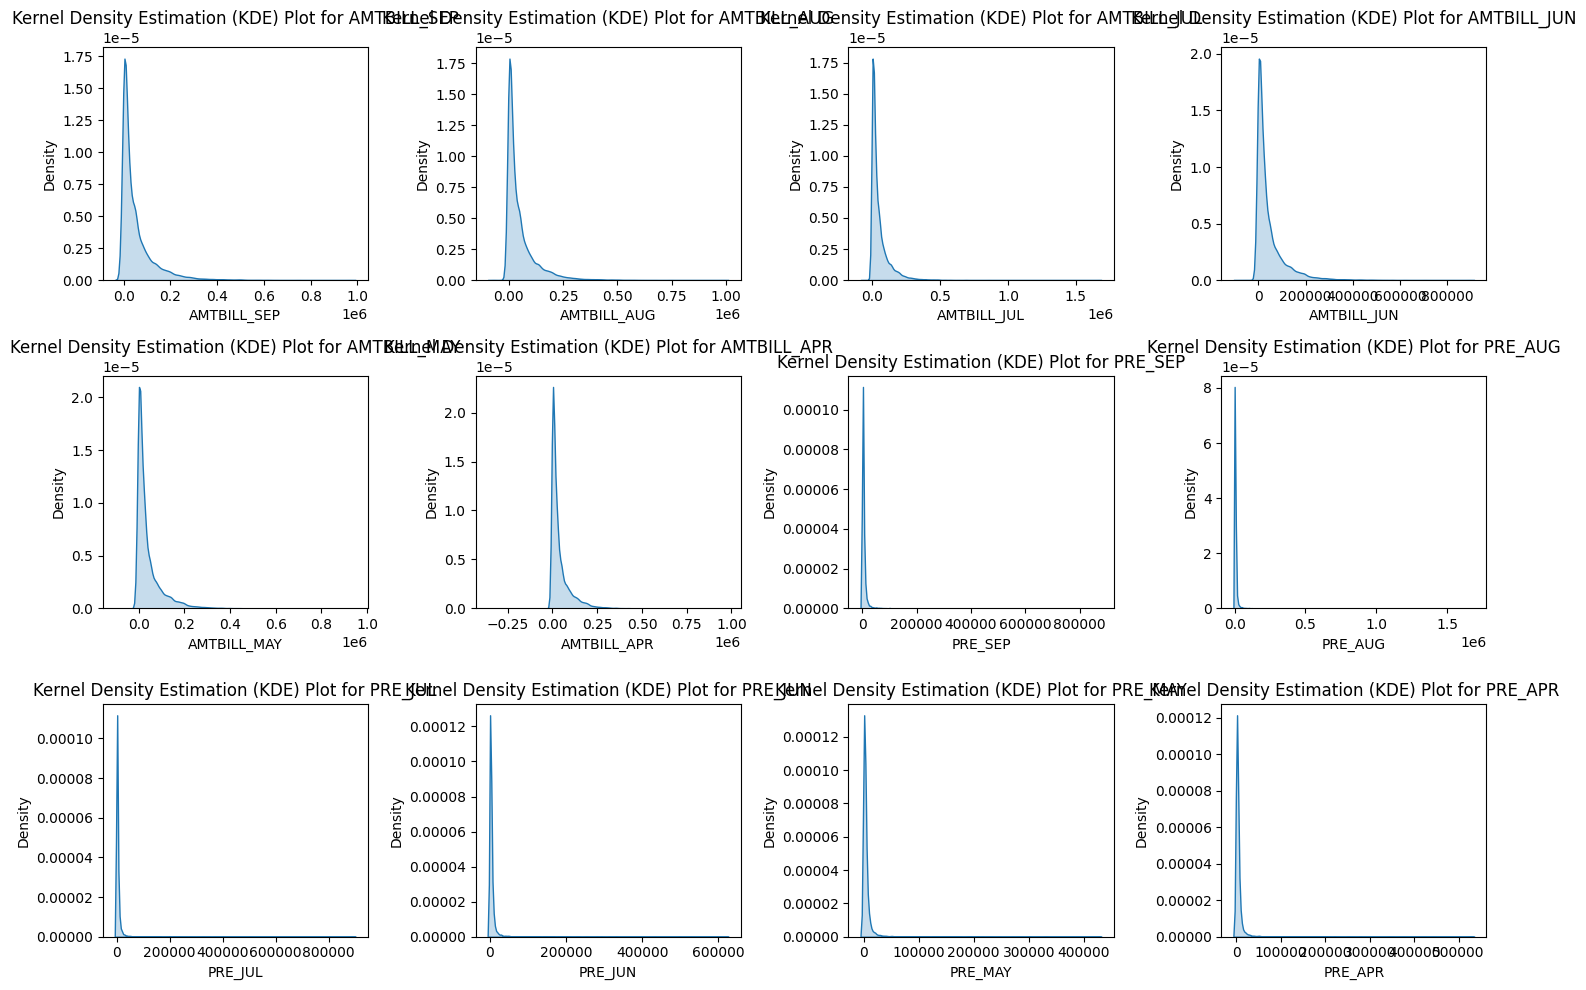

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, col in enumerate(col_list):
    ax = axes[i // 4, i % 4]
    sns.kdeplot(df[col], shade=True, ax=ax)
    ax.set_title(f'Kernel Density Estimation (KDE) Plot for {col}')
plt.tight_layout()
plt.show()

All the density plots above look skewed, so let us find the confidence intervals also similarly using bootstrap method and robust estimators.

In [15]:
def find_ci(column):
    
    # Bootstrap method to estimate confidence intervals for the mean
    n_iterations = 1000
    means = []
    for _ in range(n_iterations):
        sample = resample(df[column], replace=True, n_samples=len(df[column]))
        means.append(np.mean(sample))

    confidence_interval_mean = np.percentile(means, [2.5, 97.5]) # assuming 95% confidence
    


    # Robust estimators to estimate confidence intervals for the median
    median_estimate = np.median(df[column])
    mad_estimate = 1.4826 * mad(df[column])  # MAD is Mean Absolute Deviation
    lower_bound = median_estimate - 1.96 * mad_estimate
    upper_bound = median_estimate + 1.96 * mad_estimate
    confidence_interval_median=[lower_bound, upper_bound]
    
    return confidence_interval_mean,confidence_interval_median

In [16]:
for i in col_list:
    print(f"{i}:")
    ci_mean,ci_median=find_ci(i)
    print(f"    Confidence Interval for Mean is {ci_mean}")
    print(f"    Confidence Interval for Median is {ci_median}")

AMTBILL_SEP:
    Confidence Interval for Mean is [50424.21033316 52073.45896335]
    Confidence Interval for Median is [-71539.40841978027, 116336.40841978027]
AMTBILL_AUG:
    Confidence Interval for Mean is [48465.87802975 50076.83660041]
    Confidence Interval for Median is [-68508.40289627334, 110940.40289627334]
AMTBILL_JUL:
    Confidence Interval for Mean is [46287.50311229 47848.14217635]
    Confidence Interval for Median is [-64794.84977752433, 104981.84977752433]
AMTBILL_JUN:
    Confidence Interval for Mean is [42591.39425232 44040.84946475]
    Confidence Interval for Median is [-61257.10221801247, 99373.10221801247]
AMTBILL_MAY:
    Confidence Interval for Mean is [39620.85903338 41010.8129302 ]
    Confidence Interval for Median is [-58088.64974698602, 94325.64974698602]
AMTBILL_APR:
    Confidence Interval for Mean is [38286.88710565 39597.54740379]
    Confidence Interval for Median is [-55162.25807057257, 89359.25807057257]
PRE_SEP:
    Confidence Interval for Mean i

Moving on...
- Gender has 2 possible values, so it must follow binomial distribution
- Education, marital status and all the Previous payment columns have 5 ,3 and 9 values respectively. So, they must be following multinomial distributions.
- Age is a discrete variable, but it is not categorical, so it might be following a normal or a skewed distribution.    

In [17]:
ci_mean,ci_median=find_ci('AGE')
print(f"Confidence Interval for Mean of AGE is {ci_mean}")
print(f"Confidence Interval for Median of AGE is {ci_median}")

Confidence Interval for Mean of AGE is [35.38070349 35.5882837 ]
Confidence Interval for Median of AGE is [8.15027286192067, 59.84972713807933]


##### Hypothesis Testing to find out the factors contributing to Defaults:

We can do some hypothesis testing to see how each of our features are related to our target variable DEF_AMT.  

###### Credit Amount Vs Default Status
Since it is a continuous variable, we can perform t-test or f-test.  
If we find that it has an impact on the target variable, we can perform a correlation test like pearson's correlation coefficient to see how it is correlated.  

H0: There is no relationship between Credit Amount(AMT) and the Defautl Status(DEF_AMT)  
H1: There is a relationship between Credit Amount(AMT) and the Defautl Status(DEF_AMT)

In [18]:
# T-test for AMT
t_stat, p_value = stats.ttest_ind(df['DEF_AMT'], df['AMT'])
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a relationship between AMT and 'DEF_AMT' columns.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between AMT and 'DEF_AMT' columns.")

# F-test, ANOVA test for AMT
f_stat, p_value = stats.f_oneway(df['DEF_AMT'], df['AMT'])

if p_value < alpha:
    print("Reject the null hypothesis: There is a relationship between AMT and 'DEF_AMT' columns.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between AMT and 'DEF_AMT' columns.")


Reject the null hypothesis: There is a relationship between AMT and 'DEF_AMT' columns.
Reject the null hypothesis: There is a relationship between AMT and 'DEF_AMT' columns.


By both the tests, we see that the default status is impacted by the credit amount. So, let's find the correlation coefficient. using pearson's test.

In [19]:
corr_coef, p_value = stats.pearsonr(df['AMT'], df['DEF_AMT'])

print(f"Pearson's coefficient is: {corr_coef} \nand the p_value is: {p_value}")

Pearson's coefficient is: -0.15345487633446744 
and the p_value is: 2.0918649396710135e-157


This coefficient indicates a moderate negative correlation between the 'AMT' column and the default status (DEF_AMT). This suggests that higher credit amounts might be associated with a higher probability of default, and vice versa.

###### Recommendations:

- Implement risk assessment strategies that account for the impact of the credit amount on the likelihood of default. This might involve setting credit limits or adjusting interest rates based on the amount being borrowed to minimize the risk of default.
- Provide borrowers with clear information about the potential risks associated with higher credit amounts and the importance of responsible borrowing. This can include financial counseling, educational materials, or interactive tools that help borrowers make informed decisions about the credit amounts they choose to borrow.

###### Education Level Vs Default Status
We can perform a chi square test as this is a categorical variable.   

H0: There is no relationship between Education level(EDUCATION) and the Default Status(DEF_AMT)  
H1: There is a relationship between Education level(EDUCATION) and the Default Status(DEF_AMT)

In [20]:
from scipy.stats import chi2_contingency

# Create a contingency table
education_def_crosstab = np.array(pd.crosstab(df['EDUCATION'], df['DEF_AMT']))

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(education_def_crosstab, correction=False)

# Set significance level
alpha = 0.05

# Print results
if p_val < alpha:
    print("Reject the null hypothesis. There is a relationship between Education level and the Default Status.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Education level and the Default Status.")

Reject the null hypothesis. There is a relationship between Education level and the Default Status.


Since there is a relationship between education level and default status, we can find Cramer's V value to find out the association between the both.  
Cramer’s V is a measure of the strength of association between two nominal variables.

It ranges from 0 to 1 where:

- 0 indicates no association between the two variables.
- 1 indicates a perfect association between the two variables.  

It is calculated as:

Cramer’s V = √(X2/n) / min(c-1, r-1)  
where:

X2: The Chi-square statistic
n: Total sample size
r: Number of rows
c: Number of columns

In [21]:
N = np.sum(education_def_crosstab)
minimum_dimension = min(education_def_crosstab.shape)-1
  
# Calculate Cramer's V 
result = np.sqrt((chi2_stat/N) / minimum_dimension) 

print(result)

0.07236777276172048


The Cramer's V of 0.07 suggests a weak association between the variables education level and default status suggesting that education alone may not be a significant predictor of default status.

###### Recommendations:
- Further data maybe collected to explore additional variables that may have a more significant impact on default status. This could involve investigating the influence of factors such as income levels, employment status, or financial literacy on the relationship between education and default status.
- Develop targeted educational resources or financial assistance programs for borrowers with different educational backgrounds. These resources can help borrowers better understand their financial obligations, improve their financial management skills, and mitigate the risks associated with default.

###### Marital Status Vs Default Status
Since 'MARITAL STATUS' is also a similar nominal variable, we can use chi square test to find it's relationship with default status.  

H0: There is no relationship between Marital Status (MARITAL STATUS) and the Default Status (DEF_AMT).  
H1: There is a relationship between Marital Status (MARITAL STATUS) and the Default Status (DEF_AMT).

In [22]:
# Create a contingency table
maritalstatus_def_crosstab = np.array(pd.crosstab(df['MARITAL STATUS'], df['DEF_AMT']))

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(maritalstatus_def_crosstab, correction=False)

# Set significance level
alpha = 0.05

# Print results
if p_val < alpha:
    print("Reject the null hypothesis. There is a relationship between marital status and the Default Status.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between marital status and the Default Status.")

Reject the null hypothesis. There is a relationship between marital status and the Default Status.


Let us find the Cramer's V to find the strength of the association.

In [23]:
N = np.sum(education_def_crosstab)
minimum_dimension = min(maritalstatus_def_crosstab.shape)-1
  
# Calculate Cramer's V 
result = np.sqrt((chi2_stat/N) / minimum_dimension) 

print(result)

0.03127184749698647


Cramer's V of 0.03 suggests an even weaker association of marital status with the default status.

###### Recommendations:
- Consider incorporating other variables such as debt-to-income ratios, employment stability, or other financial obligations  which may have a more substantial impact on default status than marital status.
- Develop personalized financial counseling or assistance programs that cater to borrowers with different marital statuses. These programs can help individuals better manage their financial responsibilities, enhance their financial literacy, and reduce the likelihood of default.

###### Age Vs Default Status
Moving on to the relationship between Age and default status.  We can use point biserial correlation coefficient to find out the relationship between these as Age is a continuous variable and default status is binary in nature.   

Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y.

H0: There is no relationship between AGE and DEF_AMT.  
H1: There is a relationship between AGE and DEF_AMT

In [24]:
from scipy.stats import pointbiserialr

# Assuming df is your DataFrame containing the 'AGE' and 'DEF_AMT' columns
age = df['AGE']
def_amt = df['DEF_AMT']

# Calculate point-biserial correlation coefficient and associated p-value
pb_corr, pb_p_value = pointbiserialr(age, def_amt)

print(f"Point-biserial correlation coefficient: {pb_corr:.4f}")
print(f"P-value: {pb_p_value:.4f}")

# Compare the p-value with the significance level (0.05) to draw conclusions about the null hypothesis
if pb_p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between AGE and DEF_AMT.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between AGE and DEF_AMT.")


Point-biserial correlation coefficient: 0.0140
P-value: 0.0155
Reject the null hypothesis. There is a relationship between AGE and DEF_AMT.


From the above statistics, there is a very slight tendency for certain age groups to have a slightly higher or lower likelihood of default compared to others.  

Let us try making age groups and use chi square test to see if that has a stronger relationship with default status.

In [25]:
bins = [21,25,30,35,40,45,50,60,70,80]
labels = ['21-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-59','60-69', '70-79']
df['AGE_BIN'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

H0: There is no relationship between Age group and DEF_AMT.  
H1: There is a relationship between Age group and DEF_AMT

In [26]:
# Create a contingency table
agebin_def_crosstab = np.array(pd.crosstab(df['AGE_BIN'], df['DEF_AMT']))

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(agebin_def_crosstab, correction=False)

# Set significance level
alpha = 0.05

# Print results
if p_val < alpha:
    print("Reject the null hypothesis. There is a relationship between age group and the Default Status.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between age group and the Default Status.")

Reject the null hypothesis. There is a relationship between age group and the Default Status.


Let's find Cramer's V to see the strength of association.

In [27]:
N = np.sum(agebin_def_crosstab)
minimum_dimension = min(agebin_def_crosstab.shape)-1
  
# Calculate Cramer's V 
result = np.sqrt((chi2_stat/N) / minimum_dimension) 

print(result)

0.05622536123886799


This Cramer's V indicates a small effect size, indicating a minimal association between age groups and the likelihood of default.  

###### Recommendations:
- While the correlation indicates only a slight relationship between age and default status, it is still important to consider this factor while assessing credit risk. We might adjust risk models or credit scoring algorithms to account for this slight influence of age on default probability.
- Conduct further data collection and analysis to identify any specific trends or patterns within different age groups that might contribute to default. This could involve segmenting the data by age and conducting more targeted research or surveys to understand the unique financial needs and behaviors of different age groups.
- Implement targeted financial education or advisory programs focusing on improving financial literacy and promoting responsible financial practices to mitigate the risk of default.

Let us understand the relationship of REPAY columns on the default status. Since they are ordinal in nature, we can use chi square test.

In [28]:
import scipy.stats as stats

# Calculate the correlation coefficients
repay_columns = ['REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
for col in repay_columns:
    corr, p_val = stats.pearsonr(df[col], df['DEF_AMT'])
    print(f"Pearson Correlation for {col}: {corr}, p-value: {p_val}")

    # Create a cross-tabulation table
    cross_tab = pd.crosstab(df['DEF_AMT'], df[col])

    # Perform a chi-square test
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
    # Print results
    if p_val < alpha:
        print(f"\n    Reject the null hypothesis. There is a relationship between {col} and the Default Status.\n")
    else:
        print(f"\n    Fail to reject the null hypothesis. There is no relationship between {col} and the Default Status.\n")


Pearson Correlation for REPAY_SEP: 0.39602895602513627, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_SEP and the Default Status.

Pearson Correlation for REPAY_AUG: 0.32702760135165937, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_AUG and the Default Status.

Pearson Correlation for REPAY_JUL: 0.2869988924946127, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_JUL and the Default Status.

Pearson Correlation for REPAY_JUN: 0.26906560373831706, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_JUN and the Default Status.

Pearson Correlation for REPAY_MAY: 0.2607965889979629, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_MAY and the Default Status.

Pearson Correlation for REPAY_APR: 0.24438040380876147, p-value: 0.0

    Reject the null hypothesis. There is a relationship between REPAY_APR and the Defau

From the above correlation values, we can see that all the Repay columns do have moderate impacts on the default status.   

###### Recommendations:
- Focus on customers with a higher REPAY values, as they are more likely to default on their credit card payments. Implement targeted interventions, such as personalized reminders or flexible payment options, to reduce the risk of default among these customers.
- Identify any underlying patterns or reasons behind late or missed payments, which may shed light on potential risk factors for default.

The remaining columns of amount bills and previous month payments are all continuous in nature, so we can group them all together and observe how they relate to the default status.  
Let us use a point biserial correlation coefficient to understand this.

In [29]:
amtbills_prepayments=['AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL',
       'PRE_JUN', 'PRE_MAY', 'PRE_APR']
for col in amtbills_prepayments:
    

    # Calculate point-biserial correlation coefficient and associated p-value
    pb_corr, pb_p_value = pointbiserialr(df[col], df['DEF_AMT'])
    print(col)
    print(f"  Point-biserial correlation coefficient: {pb_corr:.4f}")
    print(f"  P-value: {pb_p_value:.4f}")

    # Compare the p-value with the significance level (0.05) to draw conclusions about the null hypothesis
    if pb_p_value < 0.05:
        print(f"Reject the null hypothesis. There is a relationship between {col} and DEF_AMT.\n")
    else:
        print(f"Fail to reject the null hypothesis. There is no relationship between {col} and DEF_AMT.\n")


AMTBILL_SEP
  Point-biserial correlation coefficient: -0.0199
  P-value: 0.0006
Reject the null hypothesis. There is a relationship between AMTBILL_SEP and DEF_AMT.

AMTBILL_AUG
  Point-biserial correlation coefficient: -0.0144
  P-value: 0.0128
Reject the null hypothesis. There is a relationship between AMTBILL_AUG and DEF_AMT.

AMTBILL_JUL
  Point-biserial correlation coefficient: -0.0142
  P-value: 0.0139
Reject the null hypothesis. There is a relationship between AMTBILL_JUL and DEF_AMT.

AMTBILL_JUN
  Point-biserial correlation coefficient: -0.0103
  P-value: 0.0733
Fail to reject the null hypothesis. There is no relationship between AMTBILL_JUN and DEF_AMT.

AMTBILL_MAY
  Point-biserial correlation coefficient: -0.0069
  P-value: 0.2308
Fail to reject the null hypothesis. There is no relationship between AMTBILL_MAY and DEF_AMT.

AMTBILL_APR
  Point-biserial correlation coefficient: -0.0057
  P-value: 0.3230
Fail to reject the null hypothesis. There is no relationship between AMT

From the above statistics:

- AMTBILL_SEP, AMTBILL_AUG, and AMTBILL_JUL have a weak negative correlation with the default status (DEF_AMT). This suggests that higher bill amounts in these months are associated with a slightly higher likelihood of default.
- For the AMTBILL_JUN, AMTBILL_MAY, and AMTBILL_APR columns, there is no significant relationship with the default status.
- PRE_SEP, PRE_AUG, PRE_JUL, PRE_JUN, PRE_MAY, and PRE_APR all might have a weak negative correlation with the default status (DEF_AMT). This implies that higher previous payments are associated with a slightly lower likelihood of default.

###### Recommendations:
- To mitigate default risk, focus on understanding the factors leading to higher bill amounts in September, August, and July. This might involve offering tailored payment plans or financial counseling services to customers with higher bill amounts during these months.
- Encourage timely payments by implementing reminders and incentives for customers, especially in the months of June, May, and April, where the correlation indicates no strong relationship between bill amounts and default status.
- Offer financial planning and education to help customers manage their finances better, especially those who consistently make high previous payments. This could help prevent the likelihood of default in the future.

#### In conclusion implement comprehensive credit risk assessment models that take into account various financial and personal factors to improve the accuracy of credit risk evaluations and minimize the risks associated with lending. This can help financial institutions make more informed decisions and develop effective risk mitigation strategies.

### Feature Engineering:

- ID: We can drop this column.
- AMT: We can create bins to group customers based on their credit limits.
- Gender, Education and Marital Status are already in numerical form, so these can be readily used for model building.
- AGE: We already created bins of ages, this should give us a better understanding of how a specific age group customers behave.
- REPAY columns: We can create a feature representing the average delay in payment across these months.
- AMTBILL columns: We can create new features like the difference between consecutive months' bill amounts to represent the change in bill amounts over time.
- PRE payment columns: Similar to the bill amounts, we can create new features that represent the change in payments over time or the ratio of the payment to the bill amount.

In [30]:
df=df.drop('ID', axis=1)
# Create bins for AMT column
df['AMT_BIN'] = pd.cut(df.AMT, bins=[9999, 100000, 300000, 500000, 700000, 1000000],
                      labels=['10k-100k', '100k-300k', '300k-500k', '500k-700k', '700k-1000k'])

# Calculate average delay in payment across months for REPAY columns
repay_columns = ['REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
df['AVG_DELAY'] = df[repay_columns].mean(axis=1)

# Calculate the difference between consecutive months' bill amounts for AMTBILL columns
bill_columns = ['AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN', 'AMTBILL_MAY', 'AMTBILL_APR']
df['AVG_BILLAMT'] = df[bill_columns].mean(axis=1)

# Calculate the change in payments over time for PRE payment columns
pre_columns = ['PRE_SEP', 'PRE_AUG', 'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR']
df['AVG_PREPAY'] = df[pre_columns].mean(axis=1)


In [31]:
df.head()

,AMT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT,AGE_BIN,AMT_BIN,AVG_DELAY,AVG_BILLAMT,AVG_PREPAY
0,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-24,10k-100k,0.666667,1284.000000,114.833333
1,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29,100k-300k,0.666667,2846.166667,833.333333
2,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-34,10k-100k,0.000000,16942.166667,1836.333333
3,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-39,10k-100k,0.000000,38555.666667,1398.000000
4,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59,10k-100k,0.000000,18223.166667,9841.500000


In [32]:
# Converting AGE_BIN and AMT_BIN to numerical

df['AGE_BIN'] = df['AGE_BIN'].map({'21-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-59': 7, '60-69': 8, '70-79': 9}
)
df['AMT_BIN'] = df['AMT_BIN'].map({'10k-100k': 1, '100k-300k': 2, '300k-500k': 3, '500k-700k': 4, '700k-1000k': 5}
)

df['AGE_BIN']=df['AGE_BIN'].astype(int)
df['AMT_BIN']=df['AMT_BIN'].astype(int)

In [33]:
df.head()

,AMT,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT,AGE_BIN,AMT_BIN,AVG_DELAY,AVG_BILLAMT,AVG_PREPAY
0,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,1,0.666667,1284.000000,114.833333
1,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2,2,0.666667,2846.166667,833.333333
2,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,3,1,0.000000,16942.166667,1836.333333
3,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4,1,0.000000,38555.666667,1398.000000
4,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,7,1,0.000000,18223.166667,9841.500000


Let us see what kind of relationship our engineered columns have with the default status.

###### Amount Bins Vs Default Status

Since AMT_BIN is similar to AGE_BIN, we can use chi square test to test our hypotheses.  

H0: There is no relationship between AMT_BIN and DEF_AMT.  
H1: There is a relationship between AMT_BIN and DEF_AMT

In [34]:
# Create a contingency table
amtbin_def_crosstab = np.array(pd.crosstab(df['AMT_BIN'], df['DEF_AMT']))

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(amtbin_def_crosstab, correction=False)

# Set significance level
alpha = 0.05

# Print results
if p_val < alpha:
    print("Reject the null hypothesis. There is a relationship between amount bins and the Default Status.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between amount bins and the Default Status.")

Reject the null hypothesis. There is a relationship between amount bins and the Default Status.


In [35]:
N = np.sum(amtbin_def_crosstab)
minimum_dimension = min(amtbin_def_crosstab.shape)-1
  
# Calculate Cramer's V 
result = np.sqrt((chi2_stat/N) / minimum_dimension) 

print(result)

0.15486628993107285


This Cramer's V Value suggests a small effect of amt_bins on the default status. Certain credit ranges could be more susceptible to defaults due to the spending habits or financial stability of the customers falling within those ranges.

###### Average Delay Vs Default Status

Since Average Delay is continuous variable and default status is binary, let us find point biserial coefficient to find out the relationship between them.

In [36]:
# Calculate point-biserial correlation coefficient and associated p-value
pb_corr, pb_p_value = pointbiserialr(df['AVG_DELAY'], df['DEF_AMT'])

print(f"Point-biserial correlation coefficient: {pb_corr:.4f}")
print(f"P-value: {pb_p_value:.4f}")

# Compare the p-value with the significance level (0.05) to draw conclusions about the null hypothesis
if pb_p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between Average Delay and DEF_AMT.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Average Delay and DEF_AMT.")

Point-biserial correlation coefficient: 0.3760
P-value: 0.0000
Reject the null hypothesis. There is a relationship between Average Delay and DEF_AMT.


The value of the coefficient suggests a moderate relationship between average delay and default status.

###### Average Bill Amount Vs Default Status

Similar to Average Delay, we can calculate Point biserial coefficient to find out the relationship between these two features.

H0: There is no relationship between Average Bill Amount and DEF_AMT.  
H1: There is a relationship between Average Bill Amount and DEF_AMT

In [37]:
# Calculate point-biserial correlation coefficient and associated p-value
pb_corr, pb_p_value = pointbiserialr(df['AVG_BILLAMT'], df['DEF_AMT'])

print(f"Point-biserial correlation coefficient: {pb_corr:.4f}")
print(f"P-value: {pb_p_value:.4f}")

# Compare the p-value with the significance level (0.05) to draw conclusions about the null hypothesis
if pb_p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between Average Bill Amount and DEF_AMT.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Average Bill Amount and DEF_AMT.")

Point-biserial correlation coefficient: -0.0129
P-value: 0.0254
Reject the null hypothesis. There is a relationship between Average Bill Amount and DEF_AMT.


The coefficient value indicates a very weak relationship in the negative direction which indicates that as the average bill amount increases, the likelihood of default decreases very slightly.. But this might be more significant when considered along with other features

###### Average Prepay Amount Vs Default Status

Similar to Average Delay, we can calculate Point biserial coefficient to find out the relationship between these two features.

H0: There is no relationship between Average Previous Month's Payment and DEF_AMT.  
H1: There is a relationship between Average Previous Month's Payment and DEF_AMT

In [38]:
# Calculate point-biserial correlation coefficient and associated p-value
pb_corr, pb_p_value = pointbiserialr(df['AVG_PREPAY'], df['DEF_AMT'])

print(f"Point-biserial correlation coefficient: {pb_corr:.4f}")
print(f"P-value: {pb_p_value:.4f}")

# Compare the p-value with the significance level (0.05) to draw conclusions about the null hypothesis
if pb_p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between Average Previous Month's Payment and DEF_AMT.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Average Previous Month's Payment and DEF_AMT.")

Point-biserial correlation coefficient: -0.1023
P-value: 0.0000
Reject the null hypothesis. There is a relationship between Average Previous Month's Payment and DEF_AMT.


The coefficient value indicates a weak relationship in the negative direction which indicates that as the average previous month's payment increases, the likelihood of default payment decreases slightly.

##### Additionally, we can see that the effect of Average Bill Amounts and the Average Previous Month's Payment columns are slightly higher than the individual BILLAMT and PRE payments columns. So, these might give us better results while modelling our ML models.

Though most of the features we have seem to have a very weak to weak relationship with our target variable, when put together, they can still do a good job of predicting the default status. That can help us define complex user behavior patterns that doesn't depend on just 1/2 factors but has a boquet of underlying features. This will eventually help us streamline and do targetted reachout to minimize defaults.

Let us try to develop some ML models and see if our dataset is able to predict the defaults though our independent variables seem to have weak relationships with the target variable. 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [40]:
X=df.drop('DEF_AMT',axis=1)
Y=df['DEF_AMT']

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=5,test_size=0.3)
print("shape of x_train is",xtrain.shape)
print("shape of x_test is",xtest.shape)
print("shape of y_train is",ytrain.shape)
print("shape of y_test is",ytest.shape)

shape of x_train is (20990, 28)
shape of x_test is (8996, 28)
shape of y_train is (20990,)
shape of y_test is (8996,)


In [44]:
def log_reg(xtrain,xtest,ytrain,ytest):
    model_LR = LogisticRegression()
    model_LR.fit(xtrain,ytrain)
    pv= model_LR.predict(xtest)
    print("Accuracy Score of Logistic Regression is :", accuracy_score(ytest,pv))

def DTR(xtrain,xtest,ytrain,ytest):
    model_DTR = DecisionTreeClassifier()
    model_DTR.fit(xtrain,ytrain)
    pv= model_DTR.predict(xtest)
    print("Accuracy Score of Decision Tree Classifier is :", accuracy_score(ytest,pv))
    
def RF(xtrain,xtest,ytrain,ytest):
    model_RF = RandomForestClassifier(n_estimators = xtrain.shape[1]**2)
    model_RF.fit(xtrain,ytrain)
    pv= model_RF.predict(xtest)
    print("Accuracy Score of Random Forest Classifier is :", accuracy_score(ytest,pv))

def GNB(xtrain,xtest,ytrain,ytest):
    model_NB = GaussianNB()
    model_NB.fit(xtrain,ytrain)
    pv= model_NB.predict(xtest)
    print("Accuracy Score of GaussianNaiveBaye's Classification is :", accuracy_score(ytest,pv))
    

In [45]:
log_reg(xtrain,xtest,ytrain,ytest)
DTR(xtrain,xtest,ytrain,ytest)
RF(xtrain,xtest,ytrain,ytest)
GNB(xtrain,xtest,ytrain,ytest)

Accuracy Score of Logistic Regression is : 0.7794575366829702
Accuracy Score of Decision Tree Classifier is : 0.7137616718541574
Accuracy Score of Random Forest Classifier is : 0.812361049355269
Accuracy Score of GaussianNaiveBaye's Classification is : 0.38016896398399286


Random Forest classifier seems to be the best model and Naive Baye's has the worst accuracy out of these.  
Let us do some more cleaning and see if it increases our model accuracies. We can start with finding the correlations and dropping the highly correlated columns.

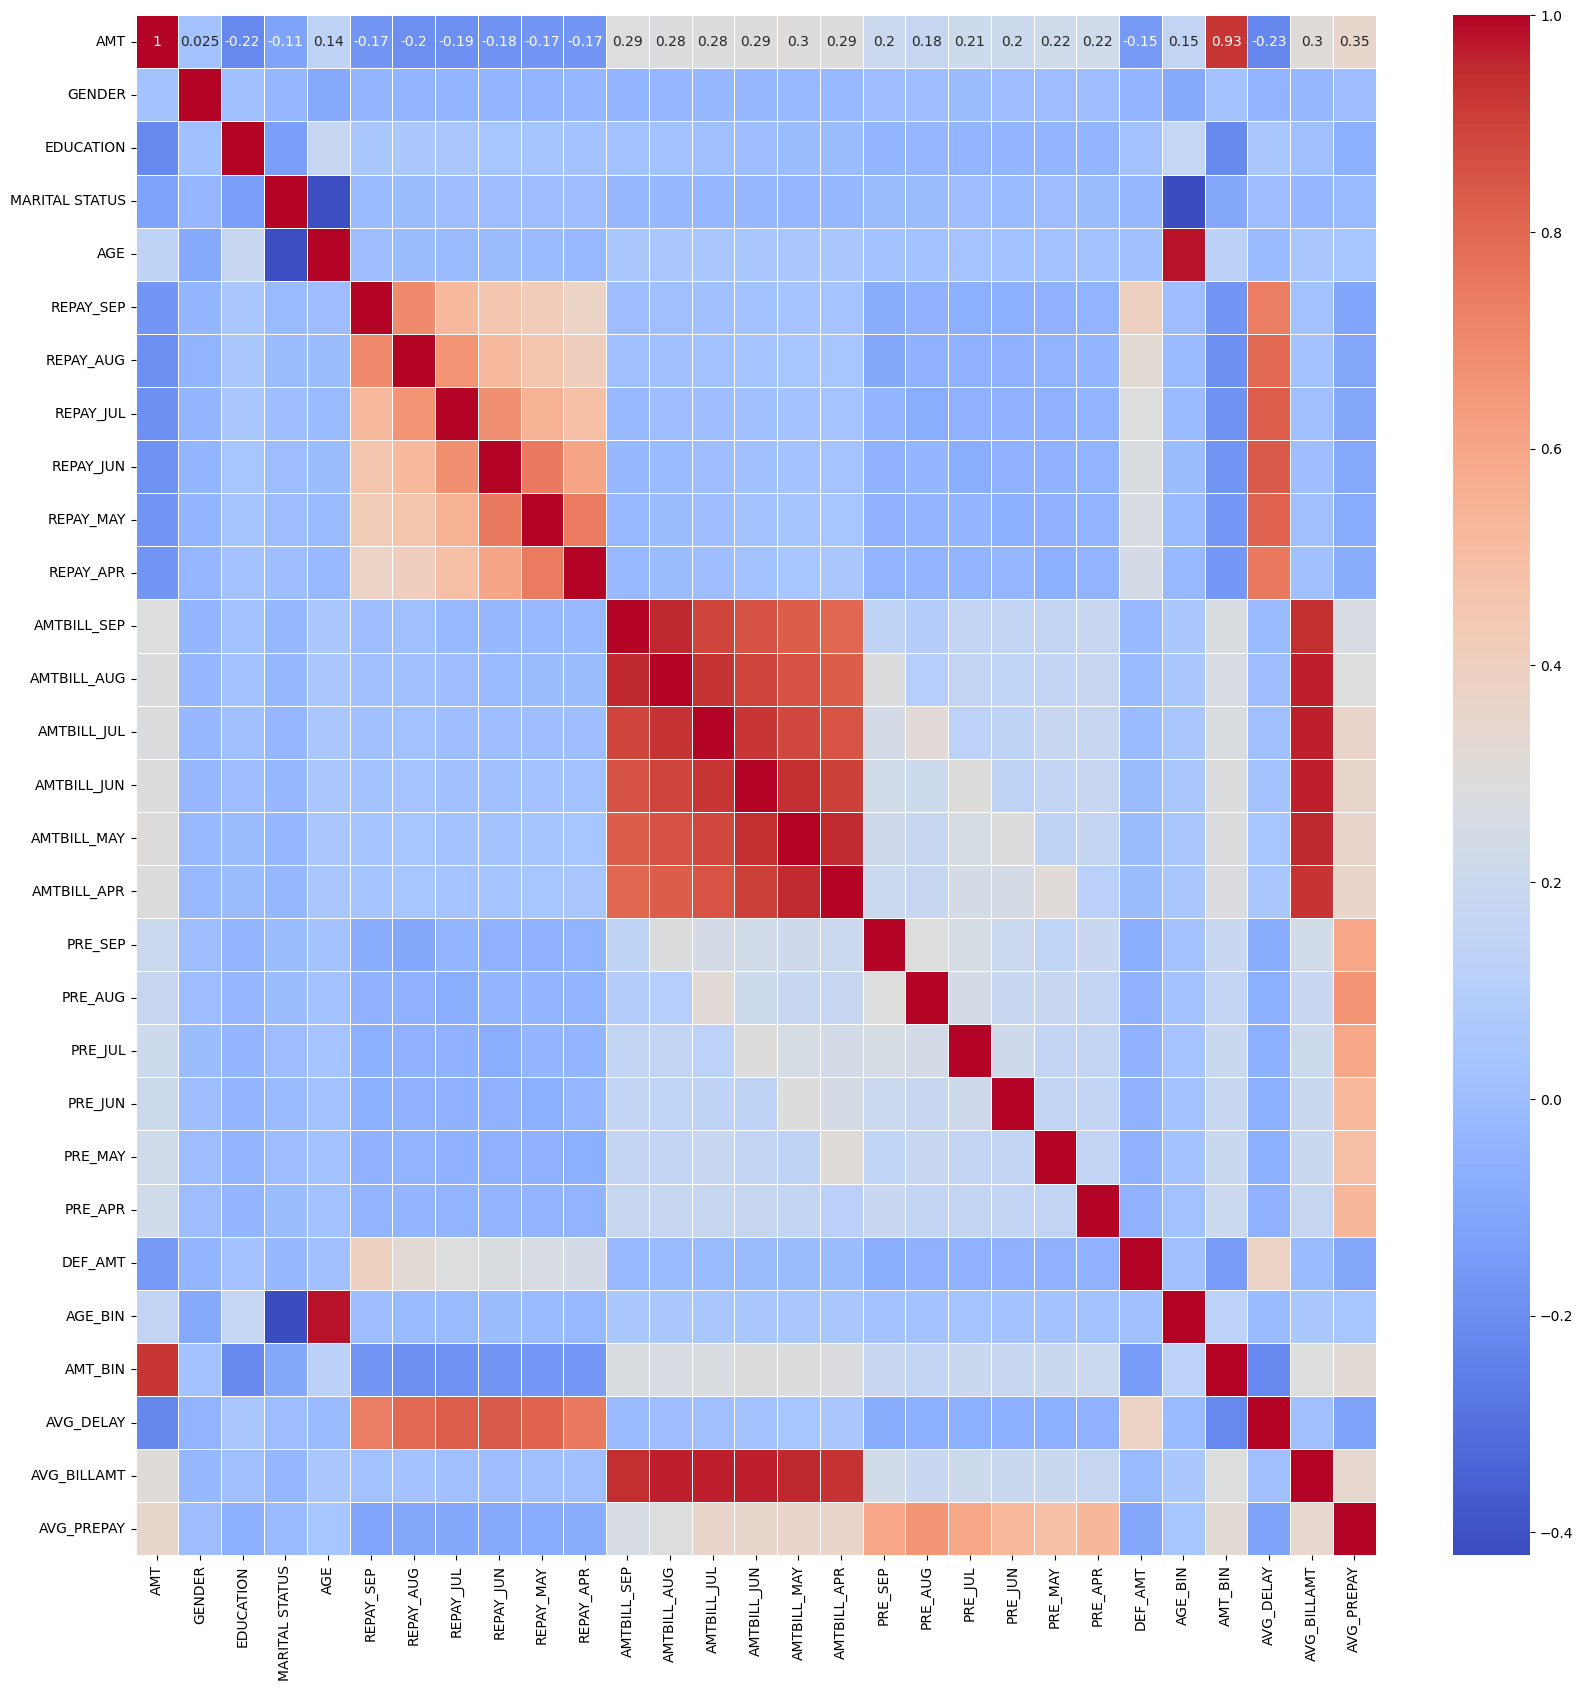

In [46]:
corr_df = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_df,annot=True,cmap='coolwarm',linewidth =0.5)
plt.show()

In [47]:
# map features to their absolute correlation values
corr = df.drop('DEF_AMT', axis=1).corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
x = corr_cols[corr_cols > 0.8]
list2 = list(x.index)
print(list2)

['AGE', 'AGE_BIN', 'AMTBILL_JUN', 'AVG_BILLAMT', 'AMTBILL_JUL', 'AMTBILL_AUG', 'AMTBILL_SEP', 'AMTBILL_MAY', 'AMTBILL_APR', 'AMT_BIN', 'AMT', 'REPAY_JUN', 'AVG_DELAY', 'REPAY_JUL', 'REPAY_MAY']


In [48]:
df.drop(list2[1:],axis=1,inplace=True)

In [49]:
df.columns

Index(['GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE', 'REPAY_SEP',
       'REPAY_AUG', 'REPAY_APR', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL', 'PRE_JUN',
       'PRE_MAY', 'PRE_APR', 'DEF_AMT', 'AVG_PREPAY'],
      dtype='object')

We can also drop those columns with least variance as they will not give any substantial information.

In [50]:
for i in df.columns:
    if df[i].var() < 0.01:
        df.drop(i, axis = 1, inplace=True)

In [51]:
df

,GENDER,EDUCATION,MARITAL STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT,AVG_PREPAY
0,2,2.0,1,24,2,2,0,0.0,689.0,0.0,0.0,0.0,0.0,1,114.833333
1,2,2.0,2,26,0,2,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,833.333333
2,2,2.0,2,34,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1836.333333
3,2,2.0,1,37,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1398.000000
4,1,2.0,1,57,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,9841.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3.0,1,39,0,0,0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,7091.666667
29996,1,3.0,2,43,0,0,0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,2415.000000
29997,1,2.0,2,37,4,3,0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,5216.666667
29998,1,3.0,1,41,1,0,0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,24530.166667


We can remove outliers for a cleaner dataset. Let us use z score to do this.

In [52]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df = df[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(26739, 15)

In [53]:
29986-26739

3247

3247 rows were removed, which is acceptable if this helps us create a better model.

In [54]:
X=df.drop('DEF_AMT',axis=1)
Y=df['DEF_AMT']

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=5,test_size=0.3)
print("shape of x_train is",xtrain.shape)
print("shape of x_test is",xtest.shape)
print("shape of y_train is",ytrain.shape)
print("shape of y_test is",ytest.shape)

shape of x_train is (18717, 14)
shape of x_test is (8022, 14)
shape of y_train is (18717,)
shape of y_test is (8022,)


In [56]:
log_reg(xtrain,xtest,ytrain,ytest)

Accuracy Score of Logistic Regression is : 0.8103964098728497


In [57]:
DTR(xtrain,xtest,ytrain,ytest)

Accuracy Score of Decision Tree Classifier is : 0.7130391423585141


In [58]:
RF(xtrain,xtest,ytrain,ytest)

Accuracy Score of Random Forest Classifier is : 0.8160059835452506


In [59]:
GNB(xtrain,xtest,ytrain,ytest)

Accuracy Score of GaussianNaiveBaye's Classification is : 0.7731239092495636


Random Forest Classifier still seems to be the best kind of model for this particular dataset closely followed by Logistic Regression.  

The removal of highly correlated columns, those columns with least variance and the removal of outliers improved the performance of the Naive Baye's classifier drastically. It also improved the accuracy of logistic regression model a little.